# 1 | Assignment: Image manipulation with Python
**ES143 Computer Vision, Harvard University, Fall 2020**

Name: **Wisoo Song**

---

When you are done solving this assignment, submit your `.ipynb` and `.html` files to the appropriate [assignment](https://canvas.harvard.edu/courses/78234/assignments/402612) on Canvas.

---

In this assignment you will become familiar with Python as a tool for manipulating images.

Coding assignments in this course will use Python 3. The skeleton code we provide will only be tested on FAS OnDemand (via the course webpage) using a Python 3 notebook and certain pre-installed packages (inlcuding numpy, scipy, and opencv). Likewise, we expect any code that you submit to execute in the course's FAS OnDemand environment.

The input image files that are required to complete this assignment can be found in the `1_ImagesInPython.zip` archive that accompanies this notebook on the course website. Be sure to upload this ZIP archive to the same directory as your notebook before running its first cell (which unpacks the archive into the same folder your notebook is in). This will be a common feature in future assignments.

Coding assignments will require you to find and use online documentation for some functions. A simple browser search such as `opencv python cv2.imread` will often find what you need (information on the function `cv2.imread()` in this case). Other helpful resources are the documentation pages for [Python](https://docs.python.org/3.7/) and useful packages like [OpenCV](https://opencv.org/), [numpy, scipy](https://docs.scipy.org/doc/numpy/reference/) and [matplotlib](https://matplotlib.org/). 

You will submit your work by editing this notebook and uploading it to the submission system on the course website. It is important that your submission executes and, as much as possible, maintains the notebook's original formatting. Submissions that do not execute or that deviate substantially in terms of formatting risk not being graded.

Remember that the online submission system closes *exactly* at the stated deadline. If you find yourself in the uncomfortable position of working very close to the deadline, we advise that you upload early and often.

***

The next few cells unzip the assignment's zip file and import some useful packages. They also set figure sizes so that they're easier to see in the notebook. You can manually change the size of a figure by calling `plt.figure(figsize=[H, W])`, where `H` and `W` are the height and width of the window.

In [1]:
# Extract zip file. This results in two images in a directory named ./data/
# ! unzip 1_ImagesInPython.zip

# Feel free to delete this cell after running to prevent unzipping again when restarting kernel and running all cells.

In [2]:
# Import any required libraries here
import cv2                               # OpenCV
import numpy as np                       # numpy
import scipy.signal                      # Signal package from scipy for convolution
import os

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters or use plt.figure(figsize=[H, W]) before specific plots.
plt.rcParams['figure.figsize'] = [10, 10]

## Question 1

In the `./data` folder there is a color image called `baboon.tif`.  This image appears frequently in the image processing literature. 

**a.** Write a sequence of Python commands that loads the image using OpenCV and reports its height and width in pixels.

*Hints: See OpenCV documentation for `cv2.imread()` and the `shape` attribute of numpy arrays. Use the built-in Python function `print()` for displaying text (and note that, unlike Python 2, Python 3 requires parentheses for this function). Using [f-strings](https://realpython.com/python-f-strings/) for formatting (or the `.format()` method) may also be useful.*

In [3]:
# TO DO: your code here
baboon = cv2.imread("./data/baboon.tif")
print(baboon.shape)


(512, 512, 3)


**b.**  Write a sequence of Python commands that converts this image to a grayscale image and displays it using the matplotlib package. In addition, display three other grayscale images that correspond to each of the three separate RGB color components. To do this you will need to understand the way OpenCV represents RGB images and how to decompose them.  Use the `subplot` command of the `matplotlib.pyplot` package to display the four results in a single row.

*Hints: See OpenCV documentation for `cv2.cvtColor()` and matplotlib documentation for `matplotlib.pyplot.imshow()`. To pretty up your plots, remove axes using `matplotlib.pyplot.axis()` and create appropriate titles using `matplotlib.pyplot.title()`. Also note that by default, OpenCV loads images in BGR order and not RGB.*

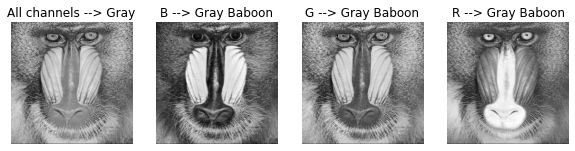

In [4]:
# TO DO: your code here

fig, ax = plt.subplots(1,4)
gray = cv2.cvtColor(baboon, cv2.COLOR_BGR2GRAY)
ax[0].set_title("All channels --> Gray")
ax[0].axis('off')
ax[0].imshow(gray, cmap="gray")

ax[1].set_title("B --> Gray Baboon")
ax[1].axis('off')
ax[1].imshow(baboon[:,:,0], cmap='gray')

ax[2].set_title("G --> Gray Baboon")
ax[2].axis('off')
ax[2].imshow(baboon[:,:,1], cmap='gray')

ax[3].set_title("R --> Gray Baboon")
ax[3].axis('off')
ax[3].imshow(baboon[:,:,2], cmap='gray')



**c.** You can use the `cv2.imwrite()` function to write an image to a file in various formats with varying levels of compression. Write code that creates a new JPEG version of the original color image with a quality setting of 95 to the file `baboon_compressed.jpg`, and then reads and displays this new image next to the original image in a single row using `matplotlib.pyplot.subplot()`. Can you tell the difference between the compressed image and the original? 

In [5]:
# TO DO: your code here
cv2.imwrite("baboon_compressed.jpg", baboon, [int(cv2.IMWRITE_JPEG_QUALITY), 95])


True

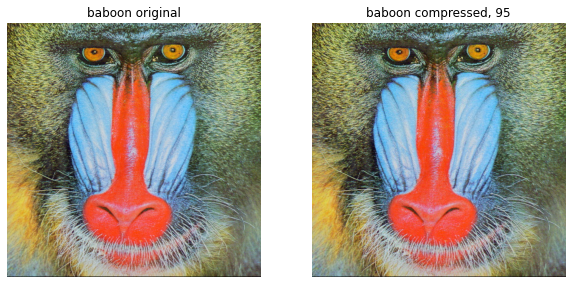

In [6]:
baboon_compressed = cv2.imread("baboon_compressed.jpg")
fig, ax2 = plt.subplots(1,2)
ax2[0].set_title("baboon original")
ax2[0].axis('off')
ax2[0].imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
ax2[1].set_title("baboon compressed, 95")
ax2[1].axis('off')
ax2[1].imshow(cv2.cvtColor(baboon_compressed, cv2.COLOR_BGR2RGB))

### Answer:
 *TO DO: Write your answer here.*
<br/>
No, it is hard to tell the difference between the two with naked eye.

**d.** The compression ratio is the ratio between the size of the original file and the size of the compressed file (in bytes). The following cell will query the file sizes and report them. Based on the cell's output (you may need to modify the cell to point to the correct location of your compressed image file), what is the compression ratio for this quality setting of 0.95?

In [7]:
# TO DO: your code here
import os

original = os.path.getsize("./data/baboon.tif")
compressed = os.path.getsize('baboon_compressed.jpg')

print(f"The compression ratio is {original/compressed}")



The compression ratio is 4.1479630771804015


### Answer:
 *TO DO: Write your answer here.* 
 <br/>
The compression ratio is 4.1479630771804015

**e.** Write code in the following cell that allows you to experiment with the JPEG quality settings, allowing you to visually compare the original and compressed images and also see the compression ratio for any quality setting you desire. Using this code, determine the smallest quality value for which the compressed image is indistinguishable from the original. What is this quality value and what is the associated compression ratio?

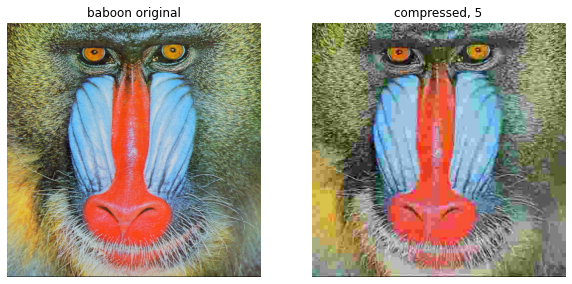

The compression ratio is 79.74876896794292


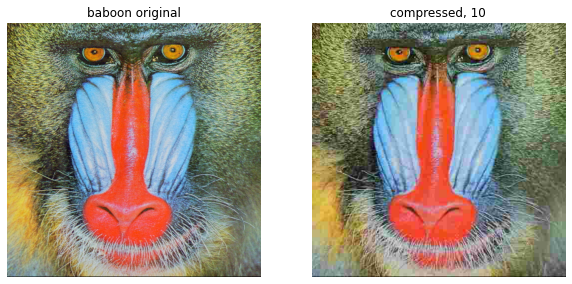

The compression ratio is 47.02696296296296


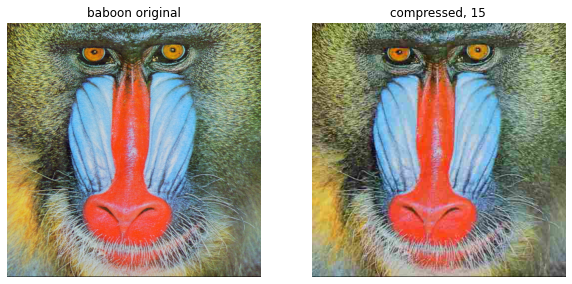

The compression ratio is 35.00573445081606


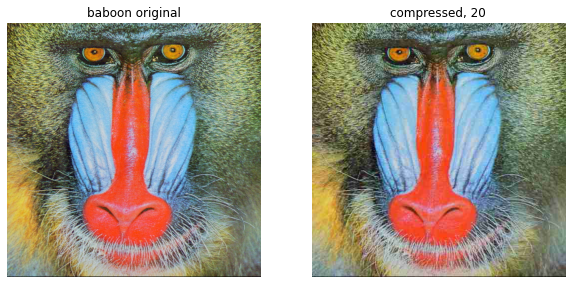

The compression ratio is 28.711287988422576


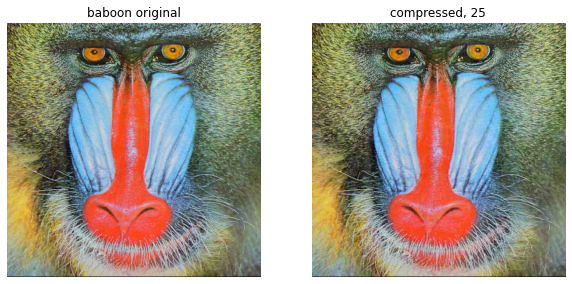

The compression ratio is 24.689045826462994


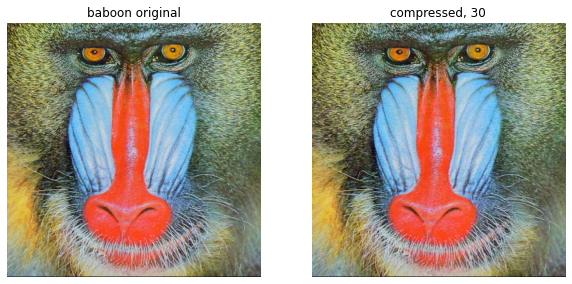

The compression ratio is 21.842452934052627


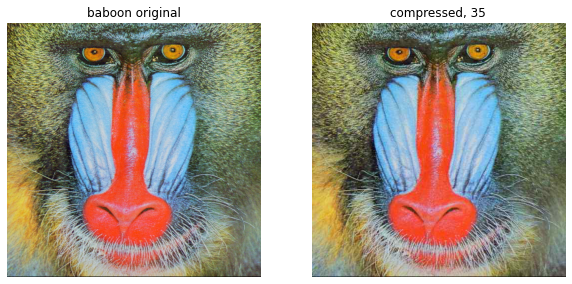

The compression ratio is 19.6576665840971


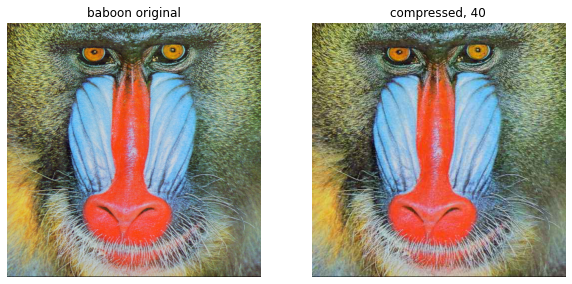

The compression ratio is 17.778126260137103


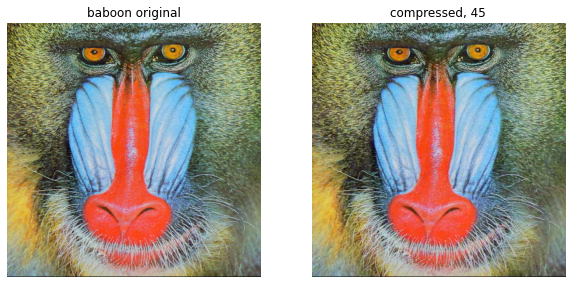

The compression ratio is 16.707650848456776


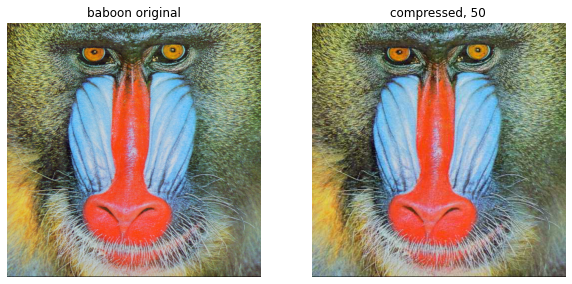

The compression ratio is 15.730029732408324


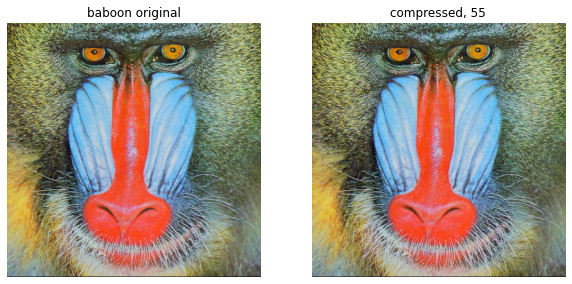

The compression ratio is 14.154894406392694


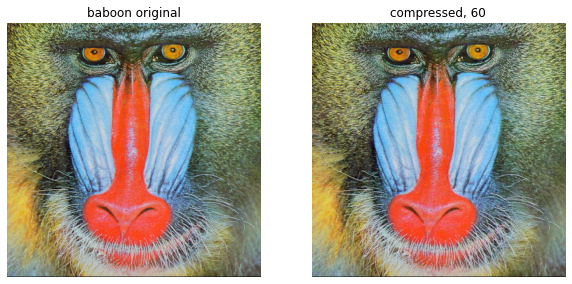

The compression ratio is 13.603373502237002


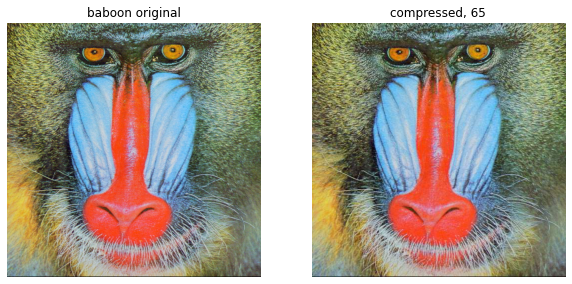

The compression ratio is 12.802155255855972


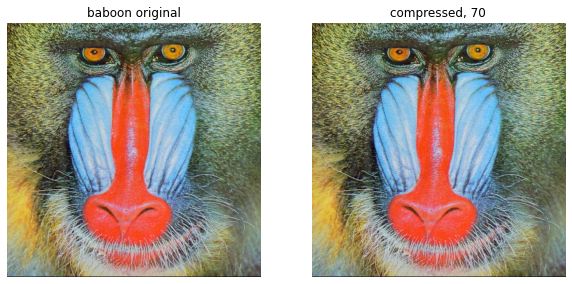

The compression ratio is 10.68291041260012


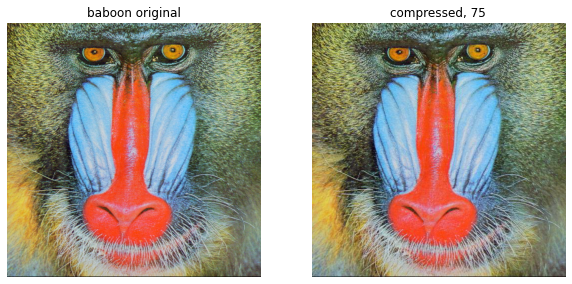

The compression ratio is 10.109685720473394


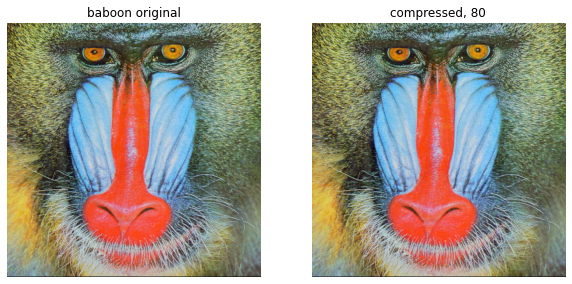

The compression ratio is 9.265490548634544


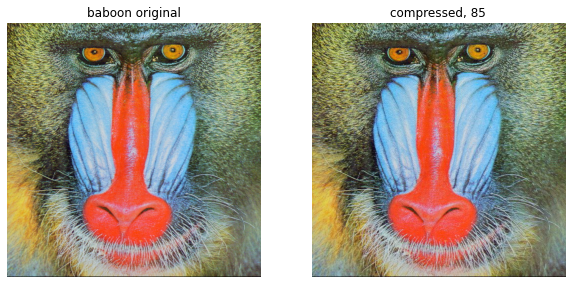

The compression ratio is 6.669468093153034


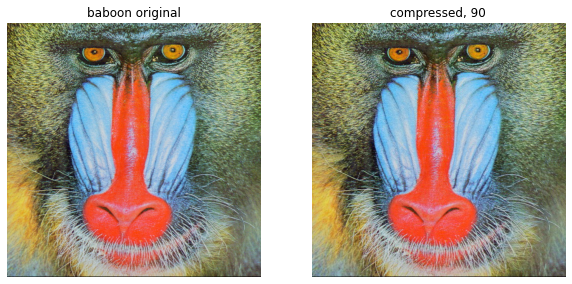

The compression ratio is 5.7207736503290825


In [8]:
# TO DO: your code here

for i in range(5, 95, 5):
    cv2.imwrite("temp.jpg", baboon, [int(cv2.IMWRITE_JPEG_QUALITY), i])
    temp_compressed = cv2.imread("temp.jpg")
    fig, ax2 = plt.subplots(1,2)
    ax2[0].set_title("baboon original")
    ax2[0].axis('off')
    ax2[0].imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
    ax2[1].set_title(f"compressed, {i}")
    ax2[1].axis('off')
    ax2[1].imshow(cv2.cvtColor(temp_compressed, cv2.COLOR_BGR2RGB))
    plt.pause(1)
    compressed = os.path.getsize('temp.jpg')

    print(f"The compression ratio is {original/compressed}")
    
    


### Answer:
 *TO DO: Write your answer here.*

I could start noticing the difference at quality setting = 15, which gave the compression ratio of 35.

## Question 2

The `./data` folder contains another popular image, `cameraman.tif`.

**a.** Write code that loads the image, converts it to grayscale, uses a random number generator to select exactly 10% of the pixels, and then replaces their gray-level values with independent, random integers uniformly distributed between 0 and 255. Display the result. Next, use subplot to display two more results beside this one, where the percentage of randomly replaced pixels in the original image is 25% and 50%, respectively. 

*Hints: The functions `numpy.random.choice()` and `numpy.random.randint()`, as well as the `flat` attribute of numpy arrays may be useful.*

In [9]:
# TO DO: your code here
cameraman = cv2.imread("./data/cameraman.tif")
cameraman = cv2.cvtColor(cameraman, cv2.COLOR_BGR2GRAY)
cameraman_flat = cameraman.flat.copy()
index_to_be_replaced_10 = np.random.choice(len(cameraman_flat), int(0.1*len(cameraman_flat)))
cameraman_flat[index_to_be_replaced_10] = np.random.randint(low=0, high=255, size=(int(0.1*len(cameraman_flat)),))


In [10]:
cameraman_flat2 = cameraman.flat.copy()
index_to_be_replaced_25 = np.random.choice(len(cameraman_flat2), int(0.25*len(cameraman_flat2)))
cameraman_flat2[index_to_be_replaced_25] = np.random.randint(low=0, high=255, size=(int(0.25*len(cameraman_flat2)),))

In [11]:
cameraman_flat3 = cameraman.flat.copy()
index_to_be_replaced_50 = np.random.choice(len(cameraman_flat3), int(0.5*len(cameraman_flat3)))
cameraman_flat3[index_to_be_replaced_50] = np.random.randint(low=0, high=255, size=(int(0.5*len(cameraman_flat3)),))

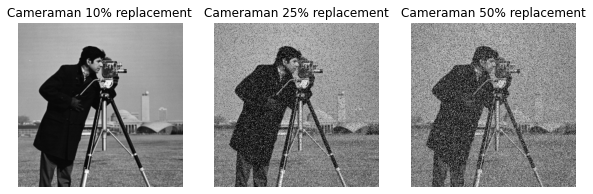

In [12]:
fig3, ax3 = plt.subplots(1,3)
ax3[0].set_title("Cameraman 10% replacement")
ax3[0].axis('off')
ax3[0].imshow(cv2.cvtColor(cameraman, cv2.COLOR_BGR2RGB))

ax3[1].set_title("Cameraman 25% replacement")
ax3[1].axis('off')
ax3[1].imshow(cv2.cvtColor(cameraman_flat2.reshape(cameraman.shape), cv2.COLOR_BGR2RGB))

ax3[2].set_title("Cameraman 50% replacement")
ax3[2].axis('off')
ax3[2].imshow(cv2.cvtColor(cameraman_flat3.reshape(cameraman.shape), cv2.COLOR_BGR2RGB))